# Problem 4
## 1.

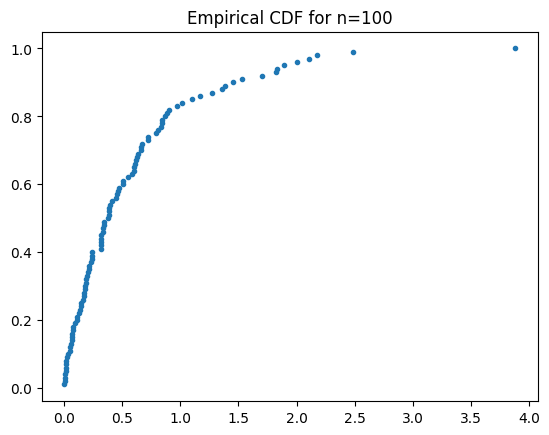

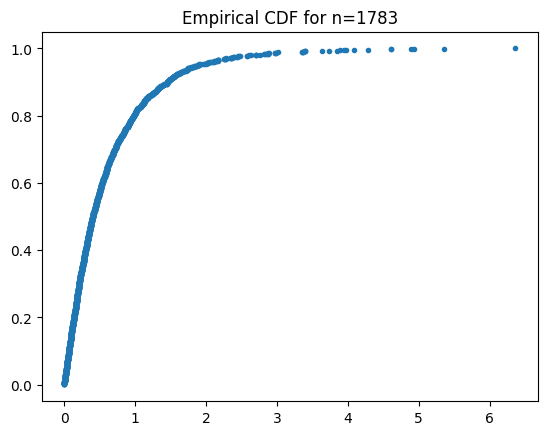

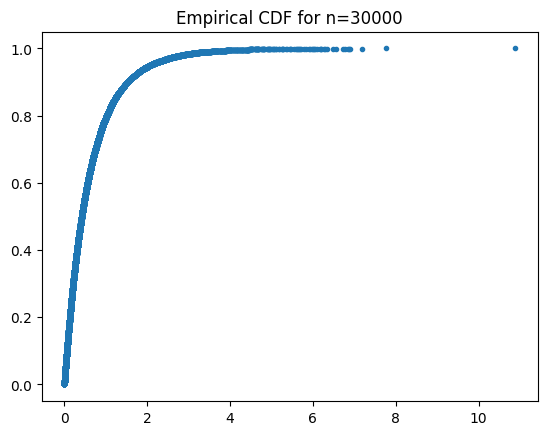

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import expon

C = None
X = []
l0 = 2
l1 = 1

for n in [100, 1783, 30000]:
    for _ in range(n):
        r1 = random.random()
        if r1 <= 0.3:
            C = 1
            X.append(expon.rvs(scale=1/l1))
        else:
            C = 0
            X.append(expon.rvs(scale=1/l0))

    X_sorted = np.sort(X)
    Y = np.arange(1, len(X_sorted) + 1) / len(X_sorted)

    plt.plot(X_sorted, Y, marker='.', linestyle='none')
    plt.title(f'Empirical CDF for n={n}')
    plt.show()
    X.clear()

## 2.

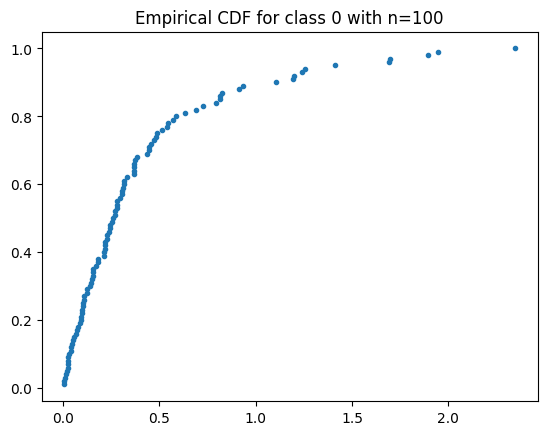

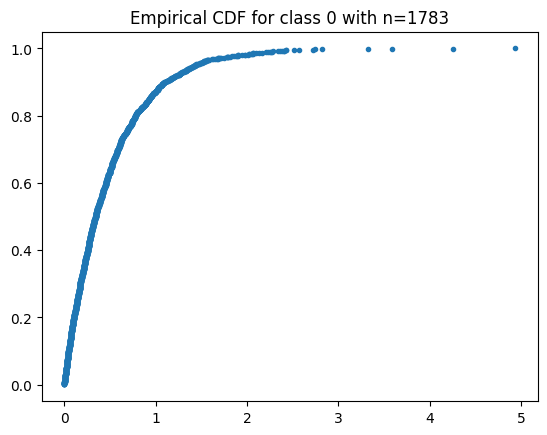

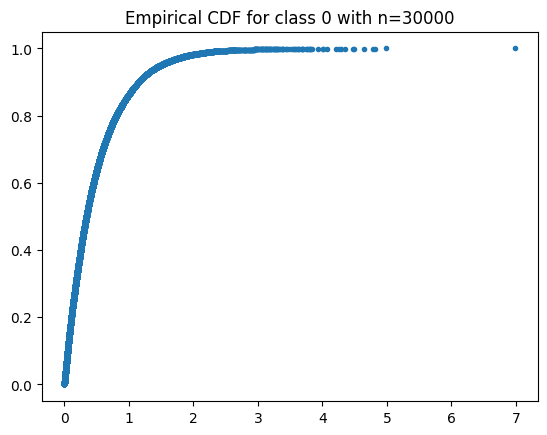

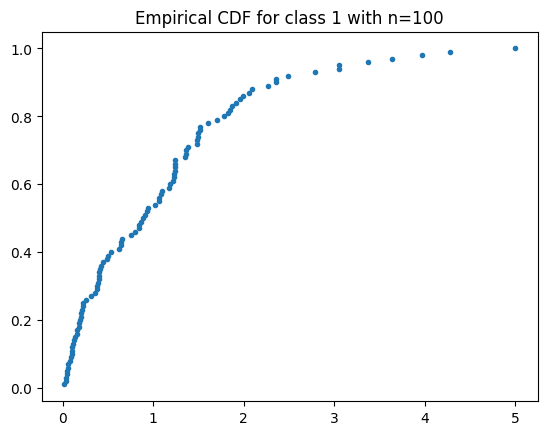

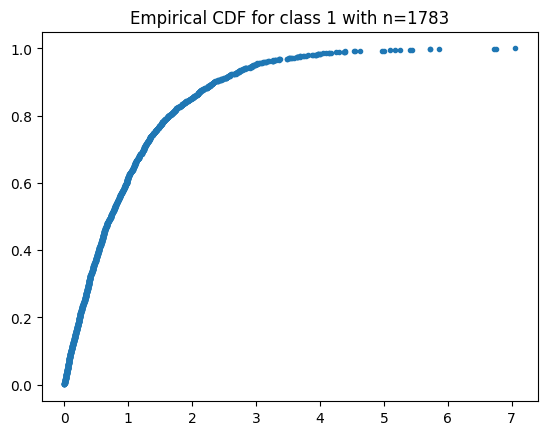

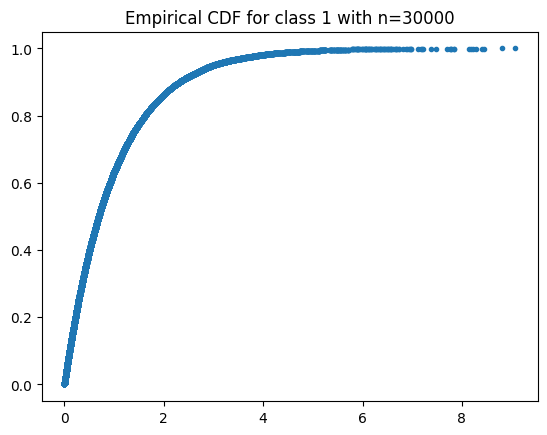

In [27]:
for j in [0, 1]:
    for n in [100, 1783, 30000]:
        for _ in range(n):
            X = np.random.exponential(scale=1/(l1 if j == 1 else l0), size=n)

        X_sorted = np.sort(X)
        Y = np.arange(1, len(X_sorted) + 1) / len(X_sorted)
        plt.plot(X_sorted, Y, marker='.', linestyle='none')
        plt.title(f'Empirical CDF for class {j} with n={n}')
        plt.show()
